In [1]:
import stuett
from stuett.global_config import get_setting, setting_exists
import argparse
from pathlib import Path
from datetime import datetime
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import utils
import numpy as np

In [289]:
# load data

temp_north = utils.load_data("MH30_temperature_rock_2017.csv")
sensor_idx = [1,3,4,5]
temp_north = temp_north[:,sensor_idx].data# take only 4 sensors to match south data, could do interpolatin later

temp_south = utils.load_data("MH10_temperature_rock_2017.csv")
temp_south = temp_south[:,7:].data # only keep temerature data

rmeter = utils.load_data("MH15_radiometer__conv_2017.csv")
solar = rmeter[:,0].data
temp_r = rmeter[:,7].data

weather = utils.load_data("MH25_vaisalawxt520windpth_2017.csv")
wind = weather[:,4].data
hum = weather[:,8].data
temp = weather[:,6].data

timestamp = np.asarray([i  for j in range(365) for i in range(24)])

In [282]:
weather = utils.load_data("MH25_vaisalawxt520windpth_2017.csv")

rmeter.coords["name"]

<xarray.DataArray 'name' (name: 14)>
array(['irradiance_shortwave_up', 'irradiance_shortwave_down', 'albedo',
       'net_solar_radiation', 'irradiance_longwave_up_notemp',
       'irradiance_longwave_down_notemp', 'net_far_infrared_radiation_notemp',
       'temperature', 'irradiance_longwave_up', 'irradiance_longwave_down',
       'net_far_infrared_radiation', 'sky_temperature', 'ground_temperature',
       'net_radiation'],
      dtype='<U33')
Coordinates:
  * name     (name) <U33 'irradiance_shortwave_up' ... 'net_radiation'
    unit     (name) <U5 'Wm^-2' 'Wm^-2' '' 'Wm^-2' ... 'Wm^-2' '°C' '°C' 'Wm^-2'

In [205]:
rmeter.coords["name"]

<xarray.DataArray 'name' (name: 14)>
array(['irradiance_shortwave_up', 'irradiance_shortwave_down', 'albedo',
       'net_solar_radiation', 'irradiance_longwave_up_notemp',
       'irradiance_longwave_down_notemp', 'net_far_infrared_radiation_notemp',
       'temperature', 'irradiance_longwave_up', 'irradiance_longwave_down',
       'net_far_infrared_radiation', 'sky_temperature', 'ground_temperature',
       'net_radiation'],
      dtype='<U33')
Coordinates:
  * name     (name) <U33 'irradiance_shortwave_up' ... 'net_radiation'
    unit     (name) <U5 'Wm^-2' 'Wm^-2' '' 'Wm^-2' ... 'Wm^-2' '°C' '°C' 'Wm^-2'

In [250]:
np.mean(np.reshape(wind,(24,365)))

nan

In [242]:
depth_north = [5,10,20,30,50,100]
depth_south = [10,35,60,85]

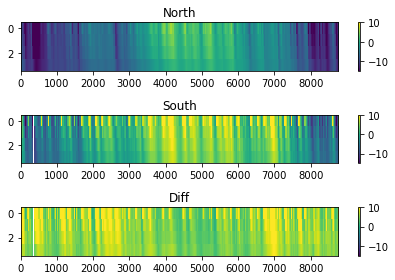

In [133]:
plt.figure()
vmin = -15
vmax = 10
plt.subplot(3,1,1)
plt.imshow(temp_north.transpose(),aspect='auto',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('North')

plt.subplot(3,1,2)
plt.imshow(temp_south.transpose(),aspect='auto',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('South')

plt.subplot(3,1,3)
plt.imshow(temp_diff.transpose(),aspect='auto',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Diff')

plt.tight_layout()
plt.show()


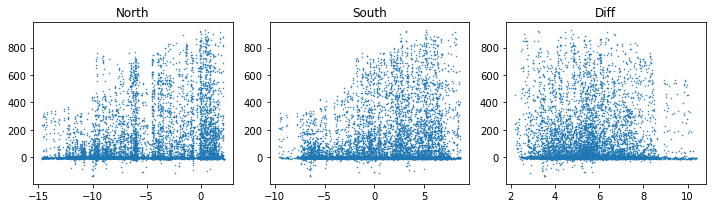

In [134]:
# relation between temperature difference and sunshie
plt.figure(figsize=[10, 3])
d = 3

plt.subplot(1,3,1)
plt.scatter(temp_north[:,d],solar,marker='.',s=1)
plt.title('North')

plt.subplot(1,3,2)
plt.scatter(temp_south[:,d],solar,marker='.',s=1)
plt.title('South')

plt.subplot(1,3,3)
plt.scatter(temp_diff[:,d],solar,marker='.',s=1)
plt.title('Diff')

plt.tight_layout()
plt.show()

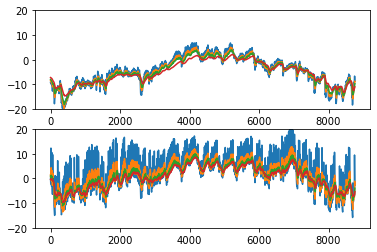

In [228]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(temp_north)
plt.ylim(-20,20)
#plt.xlim(1000,1023)

plt.subplot(2,1,2)
plt.plot(temp_south)
plt.ylim(-20,20)
#plt.xlim(1000,1023)
plt.show()

In [272]:
# calc the mean temperature according to daytime
mean_temp = np.zeros([24,4,3]) # hours, depths, n/s/diff
for hour in range(24):
    for d in range(4):
        mean_temp[hour,d,0] = np.nanmean(temp_north[timestamp==hour,d])
        mean_temp[hour,d,1] = np.nanmean(temp_south[timestamp==hour,d])
        mean_temp[hour,d,2] = np.nanmean(temp_diff[timestamp==hour,d])
        
# mean subtract for better visualization
for d in range(4):
    for i in range(3):
        mean_temp[:,d,i] = mean_temp[:,d,i] - np.nanmean(mean_temp[:,d,i])


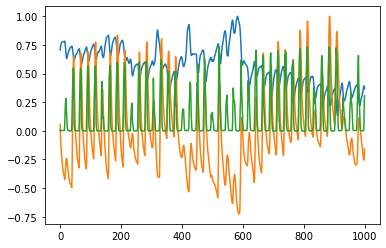

In [342]:
plt.figure()
plt.plot(temp_north[1000:2000,0]/-np.max(np.abs(temp_north[1000:2000,0])))
plt.plot(temp_south[1000:2000,0]/np.max(np.abs(temp_south[1000:2000,0])))
plt.plot(solar[1000:2000]/max(solar))
plt.show()

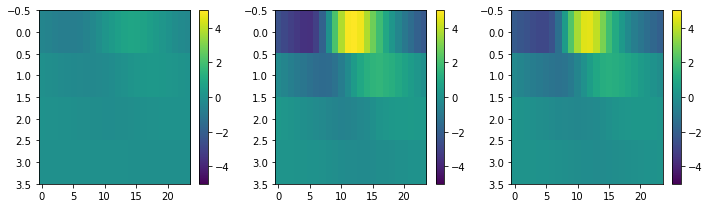

In [275]:
# relation between temperature difference and daytime
plt.figure(figsize=[10, 3])

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(mean_temp[:,:,i].transpose(),aspect='auto',vmin=-5,vmax=5)
    plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
# quantify the volatility of temperatures over the day 
# then look for relations between volatility and other factors such as
# sun / wind / snow / rain

In [337]:
ttn = np.reshape(temp_north,(24,365,4))
tts = np.reshape(temp_south,(24,365,4))

In [338]:
vol_n = np.nanstd(ttn,axis=0)
vol_s = np.nanstd(tts,axis=0)

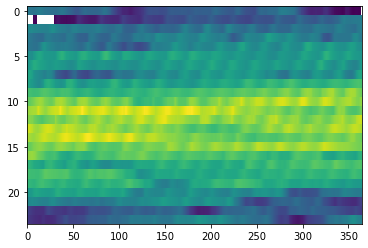

In [339]:
plt.figure()
plt.imshow(ttn[:,:,0],aspect='auto')

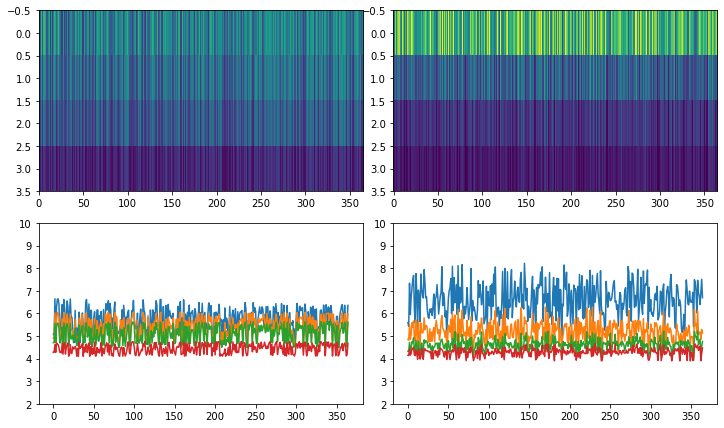

In [290]:
sort_criterion = np.nanmean(np.reshape(solar,(24,365)),axis=0)
#sort_criterion = np.nanmean(np.reshape(temp,(24,365)),axis=0)
#sort_criterion = np.nanmean(np.reshape(hum,(24,365)),axis=0)
#sort_criterion = np.nanmean(np.reshape(wind,(24,365)),axis=0)
sortIdx = np.argsort(sort_criterion)
#sortIdx = range(365)

plt.figure(figsize=[10,6])
plt.subplot(2,2,1)
plt.imshow(vol_n[sortIdx,:].transpose(),aspect='auto',vmin=4,vmax=8)

plt.subplot(2,2,2)
plt.imshow(vol_s[sortIdx,:].transpose(),aspect='auto',vmin=4,vmax=8)


plt.subplot(2,2,3)
plt.plot(vol_n[sortIdx,:])
plt.ylim(2,10)

plt.subplot(2,2,4)
plt.plot(vol_s[sortIdx,:])
plt.ylim(2,10)

plt.tight_layout()
plt.show()

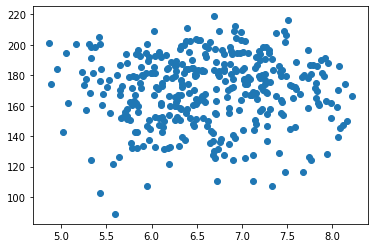

In [323]:
plt.figure()
sort_criterion = np.nanmean(np.reshape(solar,(24,365)),axis=0)
plt.scatter(vol_s[:,0],sort_criterion)

In [322]:
vol_s.shape

(365, 4)

In [226]:
np.mean(ttn,axis=0).shape

(365, 4)